In [1]:
!pip install osmnx
!pip install pandana 
!pip install osmnet
!pip install OSMPythonTools
!pip install scikit-learn




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os 
import osmnet as osmn
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import requests
import osmnx as ox
import scipy as sp
import networkx as nx
from geopandas import GeoDataFrame
import h5py
import numpy as np
import OSMPythonTools as osm

In [3]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/My Drive/ml-plus-msg/raw_data/Crashes/crash_info_general.csv')
da = pd.read_csv('/content/drive/My Drive/ml-plus-msg/raw_data/Crashes/crash_info_general.csv')
police_df = pd.read_csv('/content/drive/My Drive/ml-plus-msg/raw_data/Traffic, Investigations _ Other/police_stations.csv')

<ipython-input-4-8b603eab9d46>:1: DtypeWarning: Columns (97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/ml-plus-msg/raw_data/Crashes/crash_info_general.csv')
<ipython-input-4-8b603eab9d46>:2: DtypeWarning: Columns (97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  da = pd.read_csv('/content/drive/My Drive/ml-plus-msg/raw_data/Crashes/crash_info_general.csv')


In [5]:
df.head()

,Unnamed: 0,CRN,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,...,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,ROADWAY_CLEARED,WEATHER1,WEATHER2,WZ_WORKERS_INJ_KILLED,SECONDARY_CRASH,INTERSECTION_RELATED,fips
0,1,2010001139,2229.0,2,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,4.209120e+11
1,2,2010004457,658.0,2,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,4.210104e+11
2,3,2010005005,1217.0,2,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,4.210104e+11
3,4,2010005037,648.0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
4,5,2010005373,36.0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,4.210198e+11


In [6]:
police_df.head()

,DISTRICT_NUMBER,LOCATION,lat,lng,fips
0,7,Bustleton Ave & Bowler St,40.091030,-75.032680,4.210100e+11
1,14,Haines St & Germantown Ave,40.038425,-75.176942,4.210100e+11
2,8,Academy Rd & Red Lion Rd,40.081760,-74.994452,4.210200e+11
3,2,Harbison Ave & Levick St,40.031562,-75.063272,4.210100e+11
4,35,N Broad St & Champlost St,40.044428,-75.143506,4.210100e+11


In [7]:
df = df.drop(["LATITUDE", "LONGITUDE"], axis = 1)


In [8]:
df["LANE_CLOSED"] = df["LANE_CLOSED"].map({"Y": 1, "N": 0})
df["NTFY_HIWY_MAINT"] = df["NTFY_HIWY_MAINT"].map({"Y": 1, "N": 0})
df["SCH_BUS_IND"] = df["SCH_BUS_IND"].map({"Y": 1, "N": 0})
df["SCH_ZONE_IND"] = df["SCH_ZONE_IND"].map({"Y": 1, "N": 0})
df ["TFC_DETOUR_IND"] = df["TFC_DETOUR_IND"].map({"Y": 1, "N": 0})


In [9]:
df = df.drop(["WORKERS_PRES","WZ_CLOSE_DETOUR", "WZ_FLAGGER", "WZ_LAW_OFFCR_IND", "WZ_LN_CLOSURE", "WZ_MOVING", "WZ_OTHER", "WZ_SHLDER_MDN", "WZ_WORKERS_INJ_KILLED", "INTERSECTION_RELATED","WORK_ZONE_IND","WORK_ZONE_LOC", "WORK_ZONE_TYPE","ROADWAY_CLEARED","SECONDARY_CRASH","WEATHER2", "CONS_ZONE_SPD_LIM","LANE_CLOSED","RDWY_SURF_TYPE_CD","EST_HRS_CLOSED","SPEC_JURIS_CD","LN_CLOSE_DIR","TFC_DETOUR_IND","NTFY_HIWY_MAINT"], axis = 1)


In [10]:
df["HORSE_BUGGY_COUNT"] = df["HORSE_BUGGY_COUNT"].fillna(0)
df["HOUR_OF_DAY"] = df["HOUR_OF_DAY"].dropna()
df["SCH_BUS_IND"] = df["SCH_BUS_IND"].fillna(0)
df["SCH_ZONE_IND"] = df["SCH_ZONE_IND"].fillna(0)
df["TCD_FUNC_CD"] = df["TCD_FUNC_CD"].fillna(0)
df["fips"] = df["fips"].fillna(0)


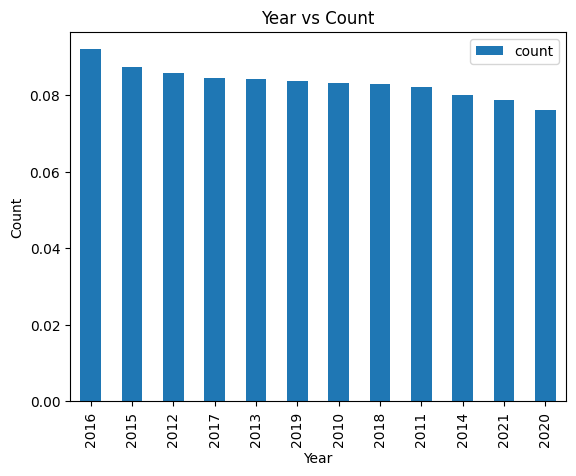

In [11]:
year_counts = df['CRASH_YEAR'].value_counts()
df_counts = pd.DataFrame({'year': year_counts.index, 'count': year_counts.values})
df_counts['count'] = df_counts['count'] / df_counts['count'].sum()
df_counts.plot(x='year', y='count', kind='bar')

plt.title('Year vs Count')
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()

In [12]:
px.set_mapbox_access_token('pk.eyJ1IjoibHVjYXMtZ2FyYXkiLCJhIjoiY2xnM2pwczdwMGJ0djNkbjFkdzllOHBtdyJ9.GZcFCoygQb3NvQb4vrNENw')

In [13]:
fig = px.density_mapbox(df.sample(100000), lat='DEC_LAT', lon='DEC_LONG', radius=2.5, zoom=5 )
fig.update_layout(
    title_text = "Crashes Heatmap"
)
fig.show()

In [14]:
TA = df.loc[:, ["CRN", "ARRIVAL_TM", "DISPATCH_TM", "TIME_OF_DAY", "DEC_LONG", "DEC_LAT", "ILLUMINATION", "WEATHER1"]]
policec = police_df.loc[:, ["DISTRICT_NUMBER", "LOCATION", "lat", "lng"]]
TA = TA.dropna()
policec = policec.dropna()
TA.head()

,CRN,ARRIVAL_TM,DISPATCH_TM,TIME_OF_DAY,DEC_LONG,DEC_LAT,ILLUMINATION,WEATHER1
0,2010001139,2229.0,2225.0,2220.0,-75.2397,39.9951,3.0,3
1,2010004457,658.0,648.0,646.0,-75.1433,39.9423,5.0,3
2,2010005005,1217.0,1203.0,1155.0,-75.1575,39.9590,1.0,3
4,2010005373,36.0,15.0,13.0,-75.2075,39.9822,3.0,7
5,2010005374,326.0,317.0,242.0,-75.0846,39.9995,3.0,3


In [15]:
policec.head()

,DISTRICT_NUMBER,LOCATION,lat,lng
0,7,Bustleton Ave & Bowler St,40.091030,-75.032680
1,14,Haines St & Germantown Ave,40.038425,-75.176942
2,8,Academy Rd & Red Lion Rd,40.081760,-74.994452
3,2,Harbison Ave & Levick St,40.031562,-75.063272
4,35,N Broad St & Champlost St,40.044428,-75.143506


In [16]:
TA["ARRIVAL_TM"] = TA["ARRIVAL_TM"].dropna()
TA["DISPATCH_TM"] = TA["DISPATCH_TM"].dropna()
TA["ARRIVAL_TM"] = TA["ARRIVAL_TM"].astype(int)
TA["DISPATCH_TM"] = TA["DISPATCH_TM"].astype(int)
TA = TA[TA["DISPATCH_TM"] <= 2359]
TA = TA[TA["ARRIVAL_TM"] <= 2359]

<ipython-input-16-bca268ccefd8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-bca268ccefd8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-bca268ccefd8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-bca268c

In [17]:
def time_diff(x, y):
  x_minutes = (x // 100) * 60 + (x % 100)
  y_minutes = (y // 100) * 60 + (y % 100)

  if x_minutes < y_minutes:
    x_minutes += 1440
  
  diff_minutes = x_minutes - y_minutes
  diff_hours = diff_minutes // 60
  diff_minutes %= 60
  diff_time = diff_hours * 100 + diff_minutes
  return diff_time

In [18]:
TA["TIME_TO_ACC"] = TA.apply(lambda row: time_diff(row["ARRIVAL_TM"], row["DISPATCH_TM"]), axis = 1)

(-10.0, 50.0)

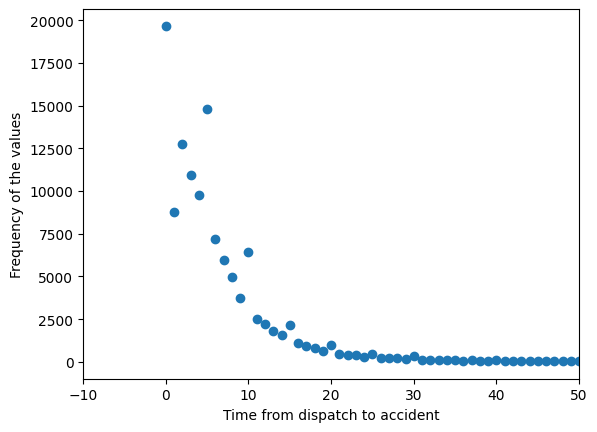

In [19]:
TA = TA[TA["TIME_TO_ACC"] <= 200]
value_counts = TA["TIME_TO_ACC"].value_counts()
wather_counts = TA["WEATHER1"].value_counts()
plt.scatter(value_counts.index, value_counts)
plt.xlabel("Time from dispatch to accident")
plt.ylabel("Frequency of the values")
plt.xlim(right= 50)

Exponential decay for some reason

In [20]:
TA = TA.drop(TA[TA["TIME_OF_DAY"] > 2359].index)
TA = TA.drop(TA[TA["WEATHER1"] > 98].index)
TA.loc[TA["WEATHER1"] == 98, "WEATHER1"] = 11
print(TA["ILLUMINATION"].value_counts())

ILLUMINATION
1.0    71637
3.0    43339
4.0     2294
2.0     1542
5.0     1323
6.0      610
8.0      331
Name: count, dtype: int64


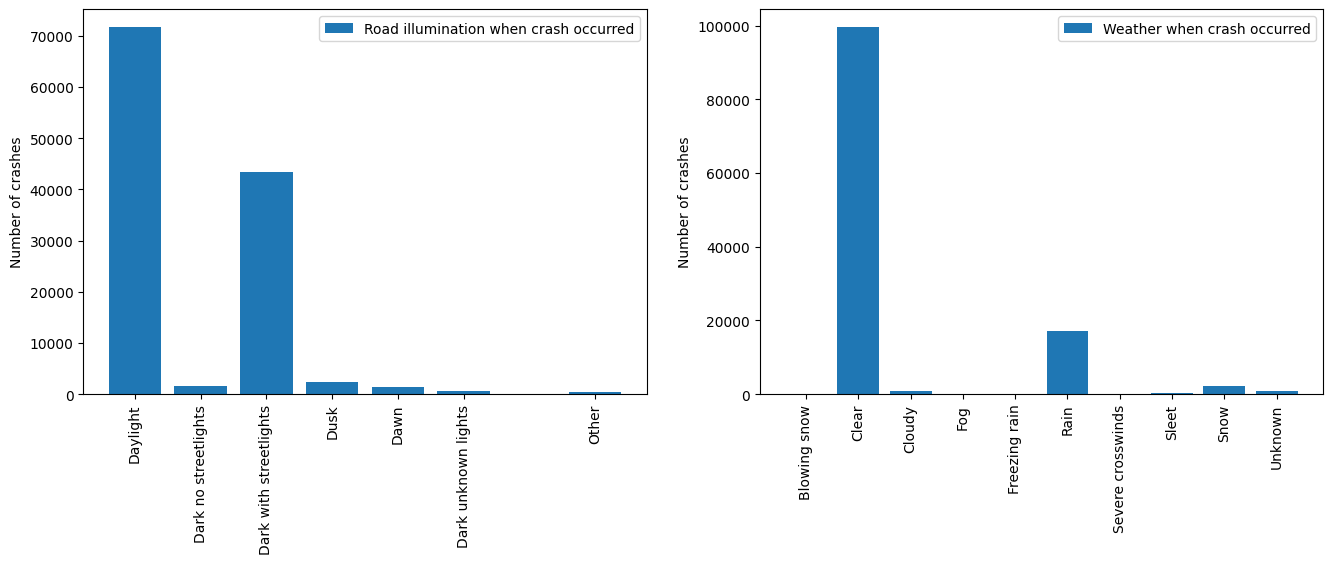

In [21]:
Illumination_ticks = ["Daylight", "Dark no streetlights", "Dark with streetlights", "Dusk", "Dawn", "Dark unknown lights", "Other"]
Weather_ticks = ["Blowing snow", "Clear", "Cloudy", "Fog", "Freezing rain", "Rain", "Severe crosswinds", "Sleet", "Snow", "Unknown"]

fig, axs = plt.subplots(1,2, figsize =(16, 5))

axs[0].bar(TA["ILLUMINATION"].value_counts().index, TA["ILLUMINATION"].value_counts().values, label="Road illumination when crash occurred")
axs[0].set_xticks([1, 2, 3, 4, 5, 6, 8])
axs[0].set_xticklabels(Illumination_ticks, rotation = "vertical")
axs[0].legend()
axs[0].set_ylabel("Number of crashes")

axs[1].bar(TA["WEATHER1"].value_counts().index, TA["WEATHER1"].value_counts().values, label="Weather when crash occurred")
axs[1].set_xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[1].set_xticklabels(Weather_ticks, rotation = "vertical")
axs[1].legend()
axs[1].set_ylabel("Number of crashes")
plt.subplots_adjust(wspace=0.2)


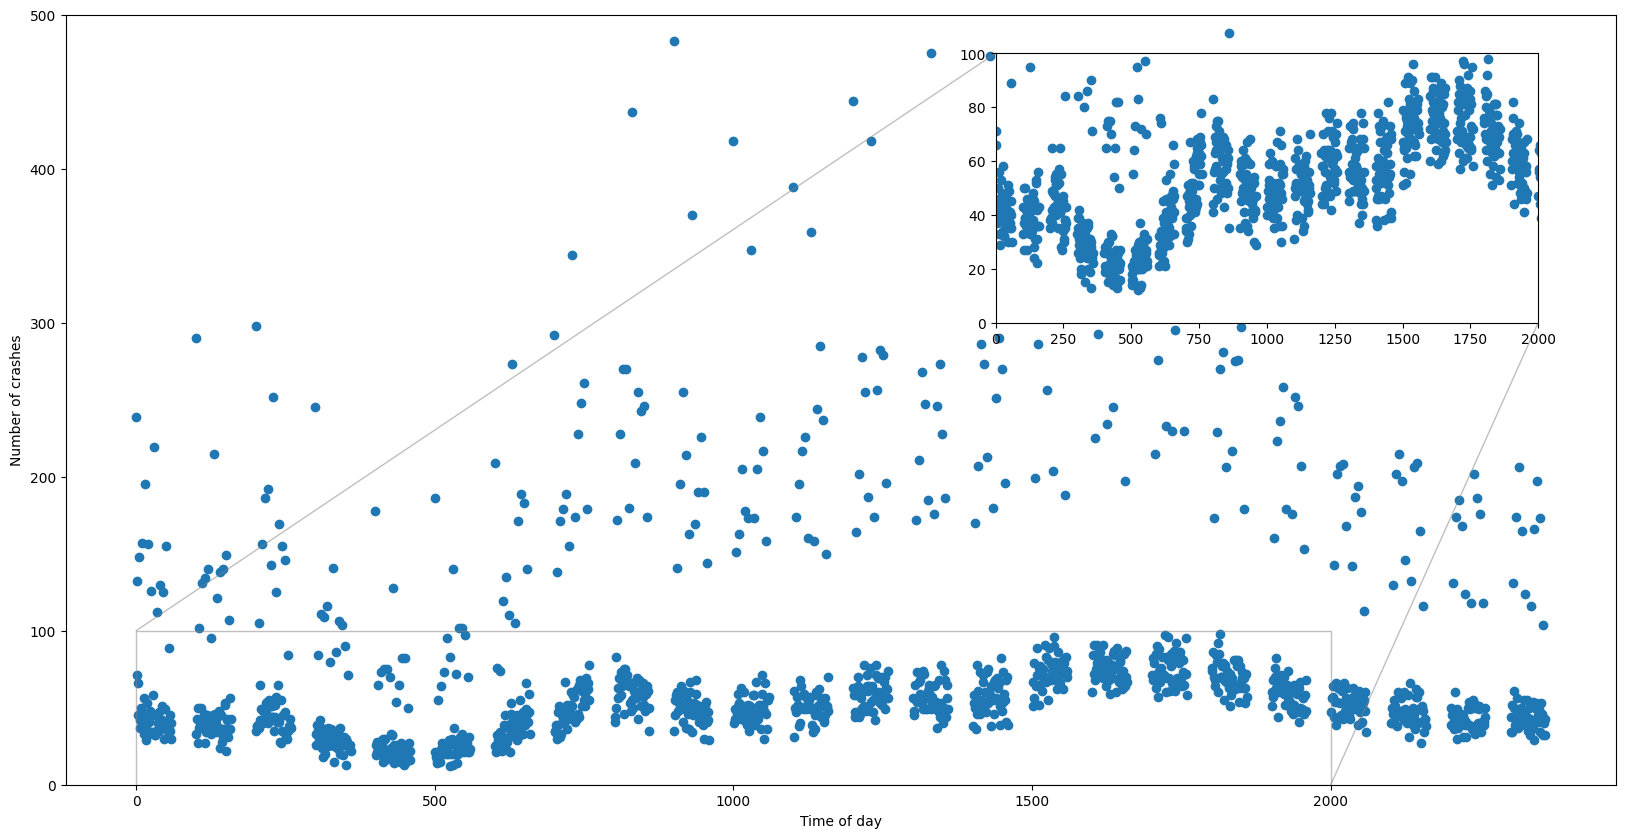

In [31]:

fig, ax = plt.subplots(figsize =(20, 10))
ax.scatter(TA["TIME_OF_DAY"].value_counts().index, TA["TIME_OF_DAY"].value_counts().values)
ax.set_ylim(0, 500)
ax.set_ylabel("Number of crashes")
ax.set_xlabel("Time of day")
axins = ax.inset_axes([0.6, 0.6, 0.35, 0.35])
axins.scatter(TA["TIME_OF_DAY"].value_counts().index, TA["TIME_OF_DAY"].value_counts().values)
axins.set_xlim(0, 2000)
axins.set_ylim(0, 100)
ax.indicate_inset_zoom(axins)

plt.show()

##
# import plotly.express as px

# temp_df =  dfs_2['crimes.csv']
# temp_df = temp_df[['dispatch_date','objectid']].groupby('dispatch_date').count().reset_index()
# temp_df.rename(columns={'objectid':'total','dispatch_date':'date'},inplace=True)
# temp_df['year'] = temp_df['date'].dt.year


# fig = px.line(temp_df, x="date", y="total", color='year')
# fig.update_layout(
#     xaxis_title="Date", yaxis_title="Total crime cases"
# )
# fig.show()



In [ ]:
amenities = ['restaurant', 'bar', 'school', 'hospital']
distance = 1000
num_pois = 10
num_categories = len(amenities) + 1
bbox = [39.867004, -75.280266, 40.137992, -74.955763]

bbox_string = '_'.join([str(x) for x in bbox])

In [ ]:
bbox_aspect_ratio = (bbox[2] - bbox[0]) / (bbox[3] - bbox[1])

fig_kwargs = {'facecolor':'w', 
              'figsize':(10, 10 * bbox_aspect_ratio)}

plot_kwargs = {'s':5, 
               'alpha':0.9, 
               'cmap':'viridis_r', 
               'edgecolor':'none'}

agg_plot_kwargs = plot_kwargs.copy()
agg_plot_kwargs['cmap'] = 'viridis'

hex_plot_kwargs = {'gridsize':60,
                   'alpha':0.9, 
                   'cmap':'viridis_r', 
                   'edgecolor':'none'}
cbar_kwargs = {}
bmap_kwargs = {}
bgcolor = 'k'


In [ ]:
network = ox.graph_from_bbox(bbox[2], bbox[0], bbox[3], bbox[1])
ox.plot.plot_graph(network)
nodes_ingraph = pd.DataFrame(network.nodes())

In [ ]:
nodes_ingraph.head()

In [ ]:
pois = pd.read_csv('/content/drive/My Drive/pois.csv')
pois = pois[pois['amenity'] != "restaurant"]
pois['node'] = pois.apply(lambda row: ox.distance.nearest_nodes(network, row['lat'], row['lon']), axis=1)
path_lengths = nx.shortest_path_length(network, source=pois['node'].index, weight='length')
nodes_within_distance = nodes_ingraph[0][path_lengths <= distance]


In [ ]:
distance_matrix = np.zeros(len(nodes_within_distance)), len(pois["node"]))

for i, x_node in enumerate(len(nodes_within_distance)):
    for j, y_node in enumerate(pois["node"]):
        distance = nx.distance.shortest_path_length(network, source = x_node, target = y_node, weight='length')
        distance_matrix[i, j] = distance

fig, ax = ox.plot_graph(G, node_color='none', show=False, close=False)
im = ax.imshow(distance_matrix, cmap='plasma', interpolation='nearest', alpha=0.7)
cbar = plt.colorbar(im, ax=ax, shrink=0.6)
plt.show()